In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
plt.set_cmap(plt.cm.Paired) # 色設定

In [2]:
# 境界線を引く関数の定義

def plotBoundary(X, clf, mesh=True, boundary=True, type='predict'):

    # plot range
    x_min = min(X[:,0])
    x_max = max(X[:,0])
    y_min = min(X[:,1])
    y_max = max(X[:,1])

    # visualizing decision function
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j] # make a grid
    
    if type == 'predict':
        Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])
    elif type == 'probability':
        Z = np.exp(clf.predict_log_proba(np.c_[XX.ravel(), YY.ravel()]))[:, 1]
    else:
        Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
    
    Z = Z.reshape(XX.shape) # just reshape

    if mesh:
        if type == 'predict':
            plt.pcolormesh(XX, YY, Z, zorder=-10) # paint in 2 colors, if Z > 0 or not
        else:
            plt.pcolormesh(XX, YY, Z, zorder=-10, cmap=plt.cm.bwr)
            plt.colorbar()

    if boundary:
        level = [0]
        if type == "probability":
            level = [0.5]
        plt.contour(XX, YY, Z, 
                    colors='k', linestyles='-', levels=level)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

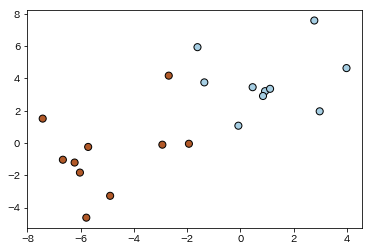

In [3]:

from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=20, # 20個生成
                  n_features=2, # 2次元
                  centers=2,    # クラスタ中心2個
                  cluster_std = 2, # クラスタの大きさ（標準偏差）
                  random_state=3   # 乱数種（再現用）
                 )

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='k'); # 2次元散布図でプロット

In [4]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=8)　 # ランダム性がある
clf.max_depth = 1　# 決定木の最大の深さを１にする

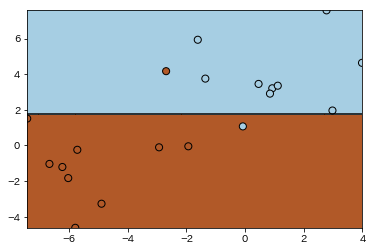

In [6]:
clf.n_estimators=1  # 決定木の数を1にする

clf.fit(X,y)
plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k') # 2次元散布図でプロット
plotBoundary(X, clf)

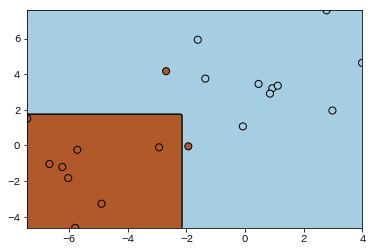

In [7]:
clf.n_estimators=2

clf.fit(X,y)
plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k') # 2次元散布図でプロット
plotBoundary(X, clf)

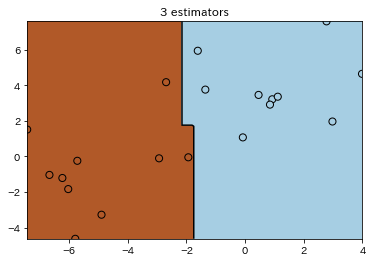

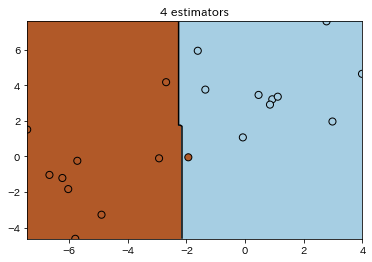

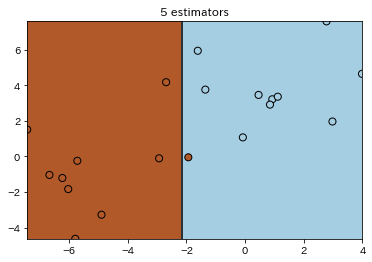

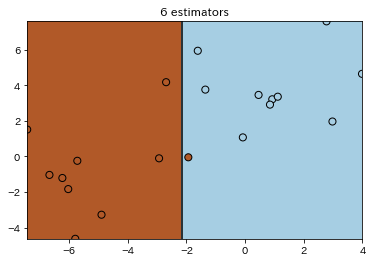

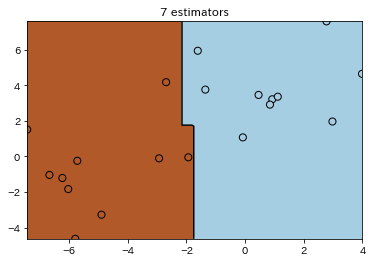

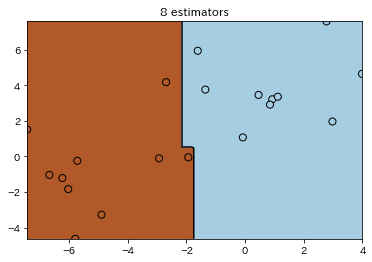

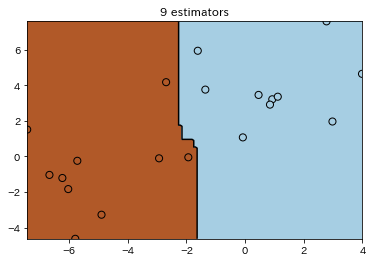

In [8]:
for i in range(3,10):
    clf.n_estimators = i
    clf.fit(X,y)
    plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k') # 2次元散布図でプロット
    plotBoundary(X, clf)
    plt.title("{0} estimators".format(i))
    plt.show()

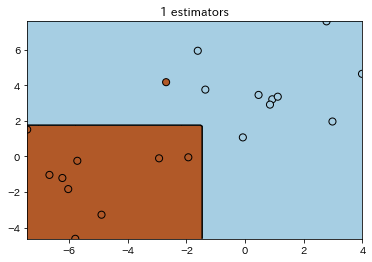

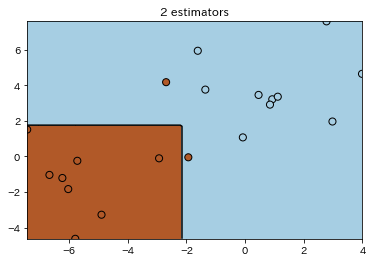

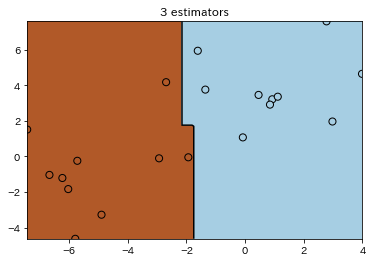

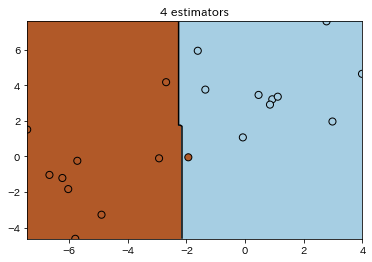

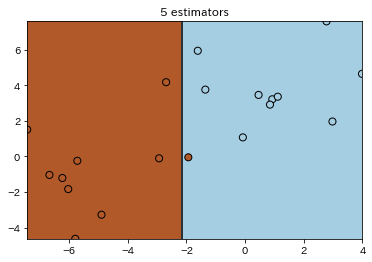

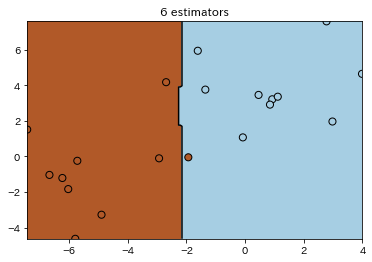

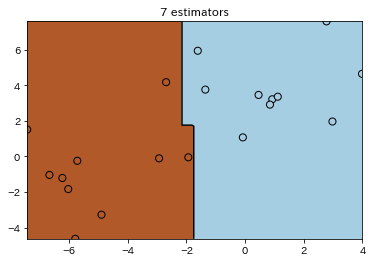

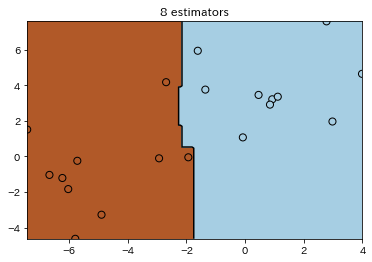

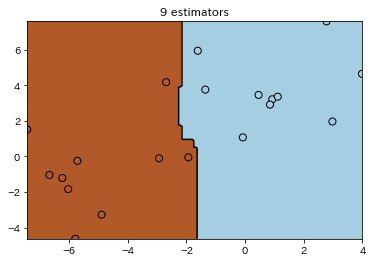

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=9, n_jobs=1,
            oob_score=False, random_state=8, verbose=0, warm_start=False)

In [9]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=8) # max_depth != 1

for i in range(1,10):
    clf.n_estimators=i
    clf.fit(X,y)
    plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k') # 2次元散布図でプロット
    plotBoundary(X, clf)
    plt.title("{0} estimators".format(i))
    plt.show()
clf

`max_depth=None`だとノードは、すべてのリーフが純粋(一つのクラスのみ)になるまで、またはすべてのリーフのサンプル数がmin_samples_splitよりも小さくなるまで展開されます

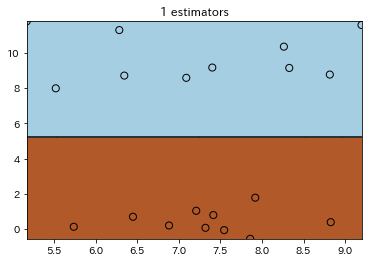

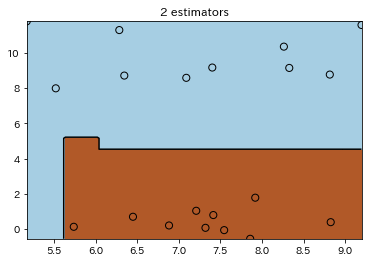

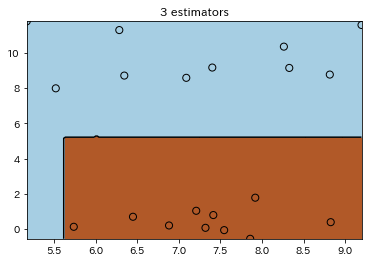

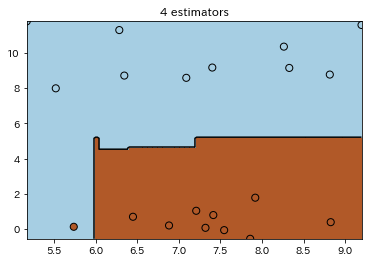

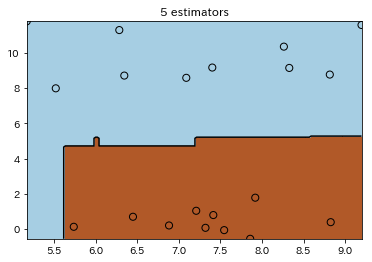

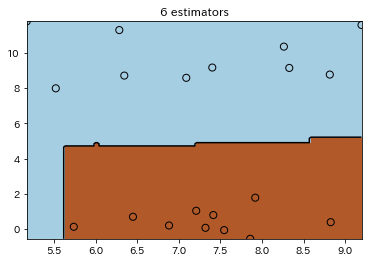

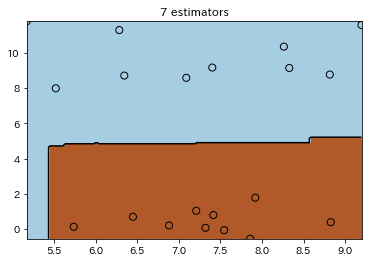

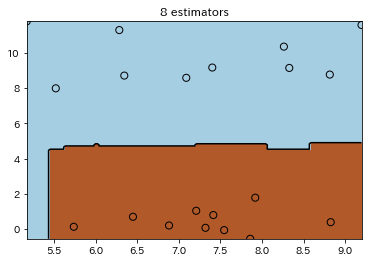

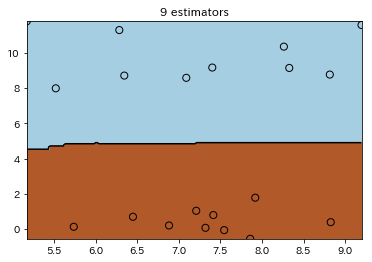

In [10]:
X, y = make_blobs(n_samples=20, # 20個生成
                  n_features=2, # 2次元
                  centers=2,    # クラスタ中心2個
                  cluster_std =1, # クラスタの大きさ（標準偏差）
                  random_state=8   # 乱数種（再現用）
                 )

for i in range(1,10):
    clf.n_estimators=i
    clf.fit(X,y)
    plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k') # 2次元散布図でプロット
    plotBoundary(X, clf)
    plt.title("{0} estimators".format(i))
    plt.show()

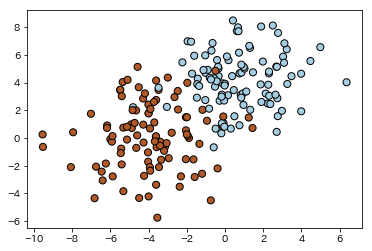

In [11]:
X, y = make_blobs(n_samples=200, # 20個生成
                  n_features=2, # 2次元
                  centers=2,    # クラスタ中心2個
                  cluster_std =2, # クラスタの大きさ（標準偏差）
                  random_state=3   # 乱数種（再現用）
                 )
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='k'); # 2次元散布図でプロット

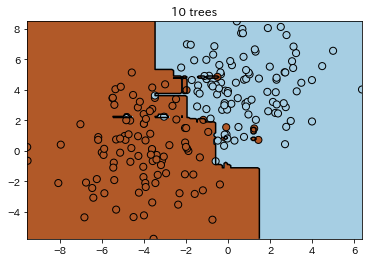

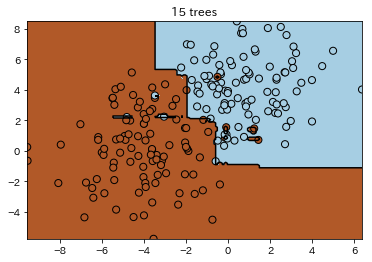

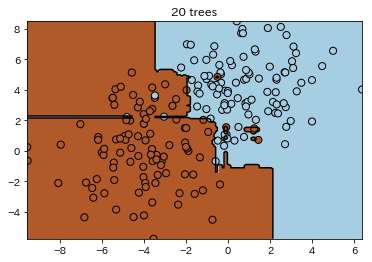

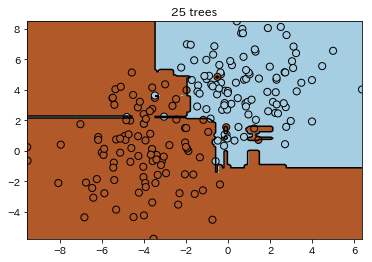

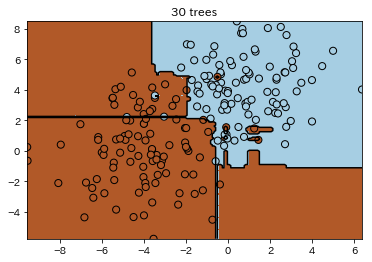

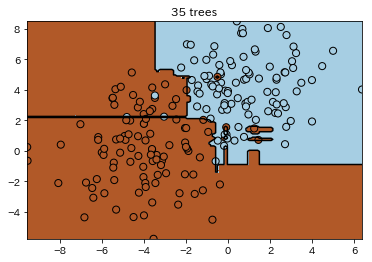

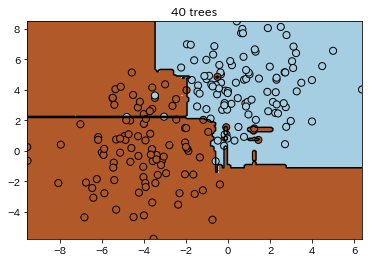

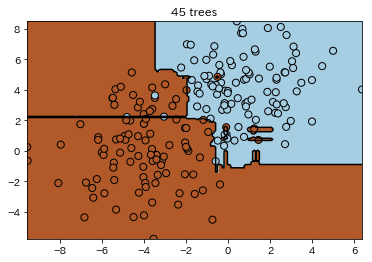

In [12]:
# 決定木の数を５つおきに変化させて識別してみる

for n in range(10,50,5):
    clf.n_estimators = n
    clf.fit(X,y)
    plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k')
    plotBoundary(X, clf)
    plt.title("{0} trees".format(n))
    plt.show()

決定技が増えれば増えるほど，識別境界は複雑になる．

In [13]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data
y = data.target

In [29]:
from sklearn.model_selection import StratifiedShuffleSplit
ss = StratifiedShuffleSplit(n_splits=1, 
                  train_size=0.8, 
                  test_size=0.2, 
                  random_state=0)

train_index, test_index = next(ss.split(X, y))

X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

In [30]:
clf = RandomForestClassifier(random_state=8)

In [31]:
from sklearn.model_selection import cross_val_score

In [43]:
scores = []
n_range = range(1,100, 10)
for n in n_range:
    clf.n_estimators = n
    clf.random_state = 8
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print("{0} trees".format(n), score)
    scores.append(score)
scores = np.array(scores)

1 trees 0.877192982456
11 trees 0.929824561404
21 trees 0.921052631579
31 trees 0.921052631579
41 trees 0.938596491228
51 trees 0.938596491228
61 trees 0.947368421053
71 trees 0.947368421053
81 trees 0.938596491228
91 trees 0.947368421053


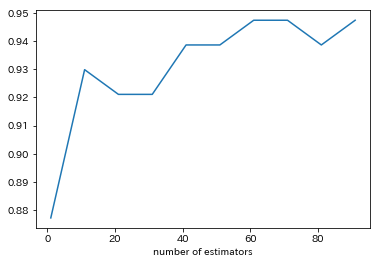

In [44]:
plt.plot(n_range, scores)
plt.xlabel("number of estimators")

In [45]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scale = scaler.transform(X_train)
X_test_scale  = scaler.transform(X_test)

In [46]:
scores2 = []
n_range = range(1,100, 10)
for n in n_range:
    clf.n_estimators=n
    clf.random_state=8
    clf.fit(X_train_scale, y_train)
    score = clf.score(X_test_scale, y_test)
    print("{0} trees".format(n), score)
    scores2.append(score)
scores2 = np.array(scores2)

1 trees 0.877192982456
11 trees 0.929824561404
21 trees 0.921052631579
31 trees 0.921052631579
41 trees 0.938596491228
51 trees 0.938596491228
61 trees 0.947368421053
71 trees 0.947368421053
81 trees 0.938596491228
91 trees 0.947368421053


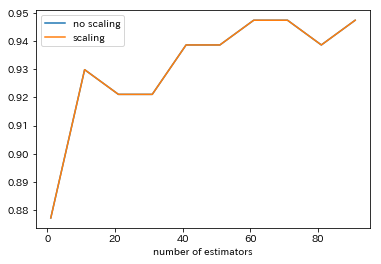

In [47]:
plt.plot(n_range, scores_mean, label="no scaling")
plt.plot(n_range, scores2, label="scaling")
plt.xlabel("number of estimators")
plt.legend(loc="best")

特徴をスケーリングしようがしまいが結果は一緒になる．

なぜならば，スケーリングしてもRandomForest の決定木は各特徴軸で分割点を決めて直線を引いているだけだからである．

識別面が斜めになる識別器にはスケーリングは意味がある．

以下講義に関係なし

In [48]:
# ならば主成分分析はどうか